# Recipe for Rating: Predict Food Ratings using ML


### Problem Overview:
In this exciting challenge,we are tasked with building predictive models to predict the ratings for each recipe using the informations like recipe names, reviews, and other important details.

  <b>It's time to turn culinary data into insights!</b>

#### Dataset Overview

This dataset is the gateway to the Recipe Ratings Prediction Challenge! Each entry captures a unique culinary story with details such as recipe names, user reviews, and various key features. Your task is to explore this rich data and develop predictive models that can forecast the ratings for every recipe. Unleash your creativity and analytical skills to unlock the secrets hidden in the world of flavors!

The dataset is composed of the following files:

- train.csv: The training set, which includes the target variable 'rating' and accompanying feature attributes.

- test.csv: The test set, containing similar feature attributes but without the target variable 'rating' , as it is the variable to be   predicted.

- sample_submission.csv: A sample submission file provided in the correct format for competition submissions.

#### Columns Description

- <b>RecipeNumber:</b> Placement of the recipe on the top 100 recipes list
- <b>RecipeCode:</b> Unique ID of the recipe used by the site
- <b>RecipeName:</b> Name of the recipe the comment was posted on
- <b>CommentID:</b> Unique ID of the comment
- <b>UserID:</b> Unique ID of the user who left the comment
- <b>UserName:</b> Name of the user
- <b>UserReputation:</b> Internal score of the site, roughly quantifying the past behavior of the user
- <b>CreationTimestamp:</b> Time at which the comment was posted as a Unix timestamp
- <b>ReplyCount:</b> Number of replies to the comment
- <b>ThumbsUpCount:</b> Number of up-votes the comment has received
- <b>ThumbsDownCount:</b> Number of down-votes the comment has received
- <b>Rating:</b> The score on a 1 to 5 scale that the user gave to the recipe (Target Variable)
- <b>BestScore:</b> Score of the comment, likely used by the site to help determine the order comments appear in
- <b>Recipe_Review:</b> Text content of the comment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')
sns.set_theme(style="whitegrid")
import gc


from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,LabelEncoder,OneHotEncoder,OrdinalEncoder,PolynomialFeatures
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score,RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_auc_score,roc_curve,precision_recall_curve,f1_score,ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression,RidgeClassifierCV,RidgeClassifier,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest,chi2,f_classif,mutual_info_classif,RFE
from imblearn.ensemble import BalancedRandomForestClassifier, EasyEnsembleClassifier, BalancedBaggingClassifier, RUSBoostClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn import pipeline as imbpipeline

In [ ]:
train = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/train.csv')

test = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')
train.head()

In [2]:
train.shape, test.shape

((13636, 15), (4546, 107724))

#### Preliminary Data Inspection

In [3]:
train

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13631,115,98,11767,Quick Cream of Mushroom Soup,sp_aUSaElGf_11767_c_127710,u_1oKVbHjirkAIWwTjbt9dWyqENo2,elbay,1,1622716969,0,0,0,5,100,Delicious!! Very easy to make! One minor chang...
13632,372,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_196030,u_1oKXoBnyJ2ocquNYwAhs19LMSrA,PauletteInhofe,1,1622717329,0,0,0,5,100,I made this pie for my family and they loved i...
13633,87,37,20170,Taco Lasagna,sp_aUSaElGf_20170_c_359338,u_1oKbGr5o9tj0mQl1rkVqzWnE481,Barbaralarkin,1,1622718089,0,0,0,5,100,Very tasty!
13634,48,63,24886,Chicken and Dumplings,sp_aUSaElGf_24886_c_175514,u_1oKWD7Dqjmc0oYHdW8Vm3fzhxJW,SammyPrissy,1,1622717192,0,0,0,5,100,I have made this numerous times. It&#39;s so ...


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13636 entries, 0 to 13635
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   ID                 13636 non-null  int64 
 1   RecipeNumber       13636 non-null  int64 
 2   RecipeCode         13636 non-null  int64 
 3   RecipeName         13636 non-null  object
 4   CommentID          13636 non-null  object
 5   UserID             13636 non-null  object
 6   UserName           13636 non-null  object
 7   UserReputation     13636 non-null  int64 
 8   CreationTimestamp  13636 non-null  int64 
 9   ReplyCount         13636 non-null  int64 
 10  ThumbsUpCount      13636 non-null  int64 
 11  ThumbsDownCount    13636 non-null  int64 
 12  Rating             13636 non-null  int64 
 13  BestScore          13636 non-null  int64 
 14  Recipe_Review      13634 non-null  object
dtypes: int64(10), object(5)
memory usage: 1.6+ MB


In [5]:
train['CreationTimestamp']

0        1622717078
1        1622717852
2        1622717357
3        1622648899
4        1622718260
            ...    
13631    1622716969
13632    1622717329
13633    1622718089
13634    1622717192
13635    1622717703
Name: CreationTimestamp, Length: 13636, dtype: int64

In [6]:
train['Rating'].value_counts()

Rating
5    10371
0     1272
4     1241
3      368
1      210
2      174
Name: count, dtype: int64

In [14]:
numeric_columns = train.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = train.select_dtypes(exclude=[np.number]).columns.tolist()
numeric_columns.remove('Rating')
categorical_columns.append('Rating')
print(numeric_columns)
print(categorical_columns)


['ID', 'RecipeNumber', 'RecipeCode', 'UserReputation', 'CreationTimestamp', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']
['RecipeName', 'CommentID', 'UserID', 'UserName', 'Recipe_Review', 'Rating']


In [8]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,13636.0,1.210853e+02,1.169956e+02,0.000000e+00,4.500000e+01,9.100000e+01,1.480000e+02,7.240000e+02
RecipeNumber,13636.0,3.862438e+01,2.967235e+01,1.000000e+00,1.200000e+01,3.300000e+01,6.300000e+01,1.000000e+02
RecipeCode,13636.0,2.178599e+04,2.388319e+04,3.860000e+02,6.504000e+03,1.460000e+04,3.312100e+04,1.917750e+05
UserReputation,13636.0,2.160311e+00,1.008642e+01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.100000e+02
CreationTimestamp,13636.0,1.623713e+09,5.444020e+06,1.613035e+09,1.622717e+09,1.622718e+09,1.622718e+09,1.665756e+09
ReplyCount,13636.0,1.452039e-02,1.373234e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
ThumbsUpCount,13636.0,1.098269e+00,4.166487e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+01
ThumbsDownCount,13636.0,5.437078e-01,3.265660e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.260000e+02
Rating,13636.0,4.288721e+00,1.544839e+00,0.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00
BestScore,13636.0,1.531279e+02,1.409869e+02,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,9.460000e+02


In [9]:
# OK so let's see the number of unique values in each column
train.nunique()

ID                     701
RecipeNumber           100
RecipeCode             100
RecipeName             100
CommentID            13636
UserID               10783
UserName             10620
UserReputation          20
CreationTimestamp     2422
ReplyCount               4
ThumbsUpCount           57
ThumbsDownCount         51
Rating                   6
BestScore              525
Recipe_Review        13370
dtype: int64

### Exploratory Data Analysis

Missing Values in Train Data: 
ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
Rating               0
BestScore            0
Recipe_Review        2
dtype: int64


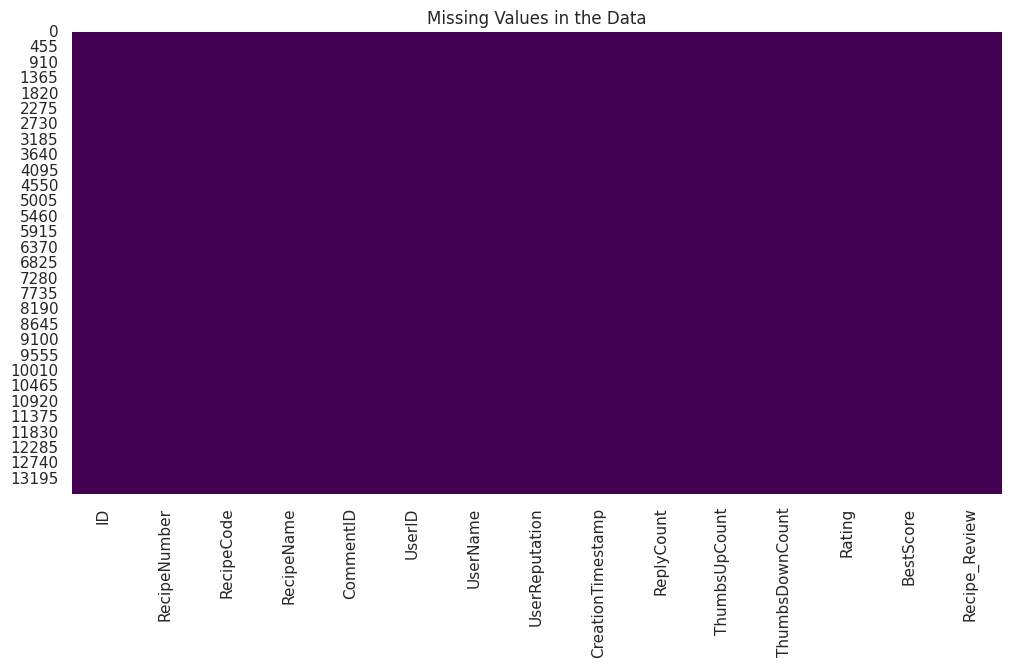




Missing Values in Test Data: 
ID                   0
RecipeNumber         0
RecipeCode           0
RecipeName           0
CommentID            0
UserID               0
UserName             0
UserReputation       0
CreationTimestamp    0
ReplyCount           0
ThumbsUpCount        0
ThumbsDownCount      0
BestScore            0
Recipe_Review        0
dtype: int64


In [12]:
# Missing Values Check

print("Missing Values in Train Data: ")
print(train.isnull().sum())
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(train.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values in the Data')
plt.show()

print("\n\n")
print("Missing Values in Test Data: ")
print(test.isnull().sum())

**No Missing Values** : 
Two missing values in Recipe_Review column can be dropped later.

#### Numerical Feature Distribution Analysis

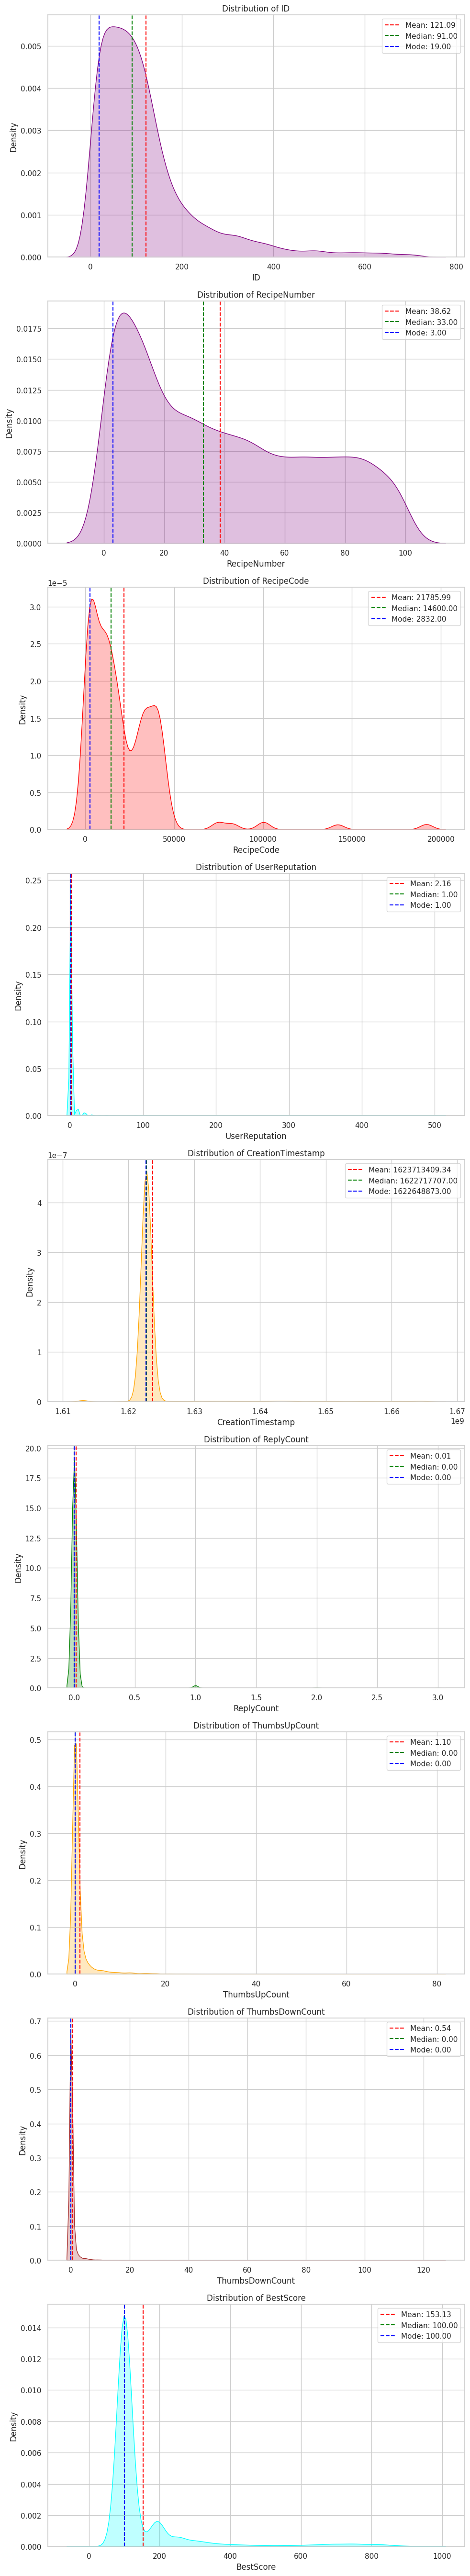

In [15]:

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(numeric_columns), ncols=1, figsize=(10, 6*len(numeric_columns)))
colors = ['red','green','blue','yellow','orange','purple','pink','brown','gray','cyan']


# Plot distribution for each numeric column
for i, column in enumerate(numeric_columns):
    sns.kdeplot(data=train, x=column, ax=axes[i],color=np.random.choice(colors),shade=True)
    
    # Calculate mean, median, and mode
    mean_val = train[column].mean()
    median_val = train[column].median()
    mode_val = train[column].mode().values[0]
    
    # Add vertical lines for mean, median, and mode
    axes[i].axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
    axes[i].axvline(mode_val, color='blue', linestyle='--', label=f'Mode: {mode_val:.2f}')
    
    # Set plot title
    axes[i].set_title(f'Distribution of {column}')
    axes[i].legend()

# Adjust layout
plt.tight_layout()
plt.show()

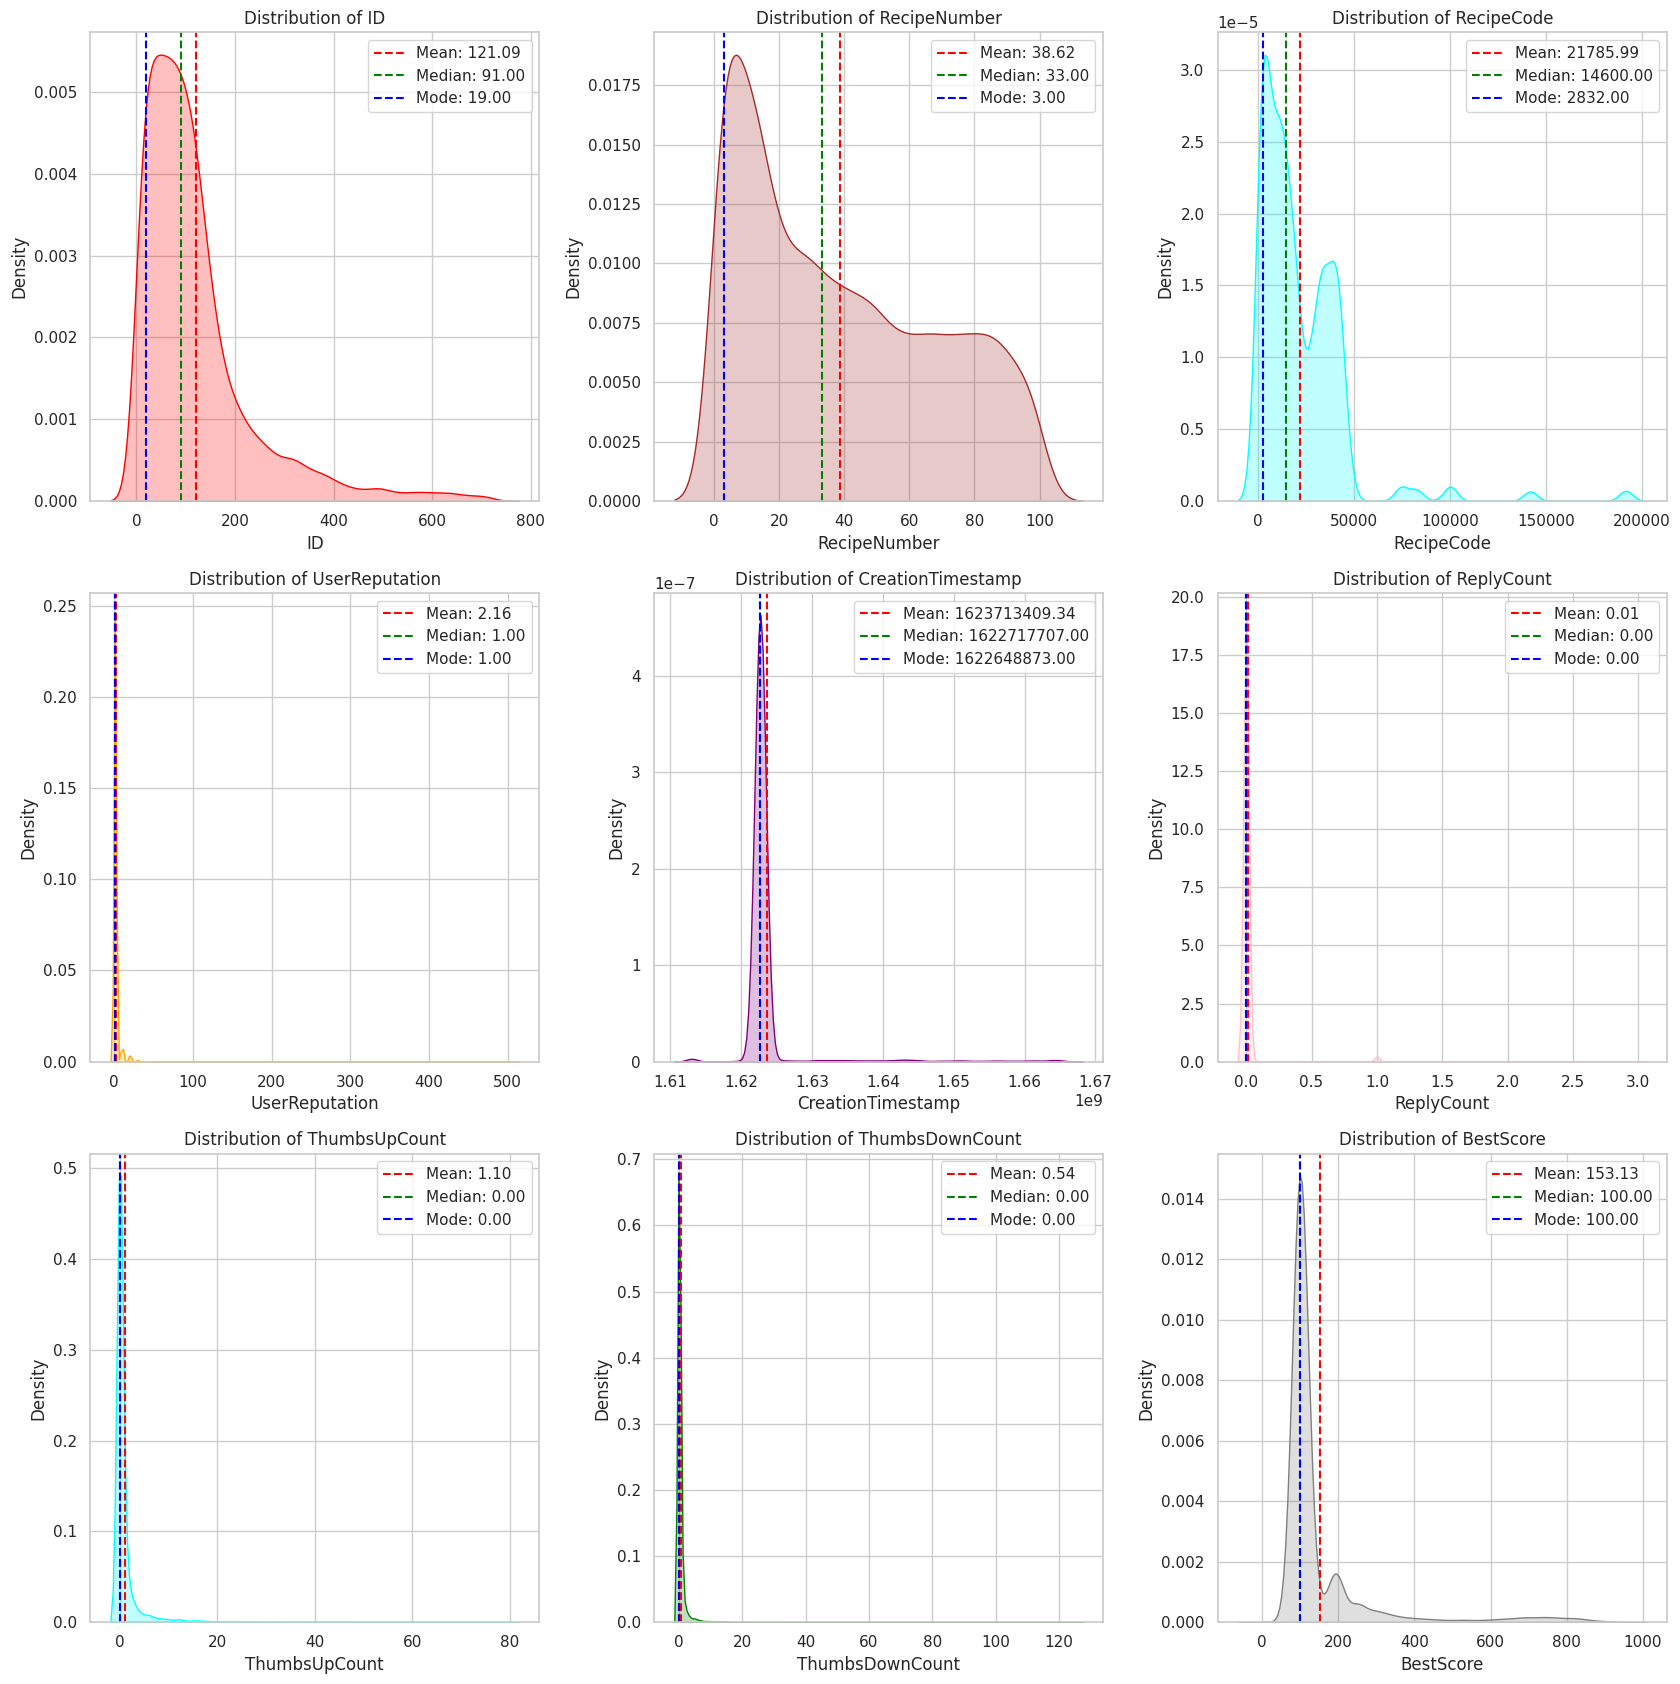

In [16]:
# #similarly kdeplot in a subplot
colors = ['red','green','blue','yellow','orange','purple','pink','brown','gray','cyan']
# increase size of figure
plt.figure(figsize=(17,17))

# iterate through the continuous features
for i in range(0, len(numeric_columns)):
    plt.subplot(3, 3, i+1)
    sns.kdeplot(train[numeric_columns[i]], color=np.random.choice(colors),shade=True)

        # Calculate mean, median, and mode
    mean_val = train[numeric_columns[i]].mean()
    median_val = train[numeric_columns[i]].median()
    mode_val = train[numeric_columns[i]].mode().values[0]

    plt.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.2f}')
    plt.axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')
    plt.axvline(mode_val, color='blue', linestyle='--', label=f'Mode: {mode_val:.2f}')

    # Set plot title
    plt.title(f'Distribution of {numeric_columns[i]}')
    plt.legend()
    
# Adjust layout
plt.tight_layout()
plt.show()


#### Insights from Numerical Columns

**ID**

  - The ID column represents a unique identifier for each data entry.
  - The distribution appears to be relatively uniform without any apparent outliers.

**RecipeNumber**

  - The RecipeNumber column seems to represent some categorical or ordinal variable related to recipes.
  - The distribution shows variability, possibly indicating different types or categories of recipes.
  - Categorization of recipes based on RecipeNumber could be explored.

**RecipeCode**

  - RecipeCode likely represents some unique code assigned to each recipe.
  - The distribution suggests a wide range of recipe codes, possibly indicating a large number of distinct recipes in the dataset.
  - Analysis of recipe patterns or clusters based on RecipeCode might reveal interesting insights.

**UserReputation**

  - UserReputation appears to represent the reputation of users interacting with recipes.
  - The majority of users have low reputation scores, with a few outliers having significantly higher reputation scores.
  - Grouping users based on reputation levels for targeted analysis could be considered.

**CreationTimestamp**

  - CreationTimestamp indicates the time when comments or interactions were made.
  - The distribution of timestamps suggests that the data spans a specific time period, likely ranging from early to late timestamps.


**ReplyCount**

  - ReplyCount represents the number of replies received for each recipe.
  - The distribution is highly skewed towards zero, indicating that most recipes have few or no replies.


**ThumbsUpCount**

  - ThumbsUpCount shows the count of thumbs-up received for each recipe.
  - The distribution is highly skewed, suggesting that most recipes receive very few thumbs-up.
  - Identification of popular recipes based on the number of thumbs-up.

**ThumbsDownCount**

  - ThumbsDownCount represents the count of thumbs-down received for each recipe.
  - Similar to ThumbsUpCount, the distribution is highly skewed, indicating that most recipes receive very few thumbs-down.



**BestScore**

  - BestScore likely indicates some performance metric or quality score associated with recipes.
  - The distribution shows variability, with some recipes having significantly higher scores compared to others.
  - Understanding the relationship between BestScore and other features to assess recipe quality or performance.


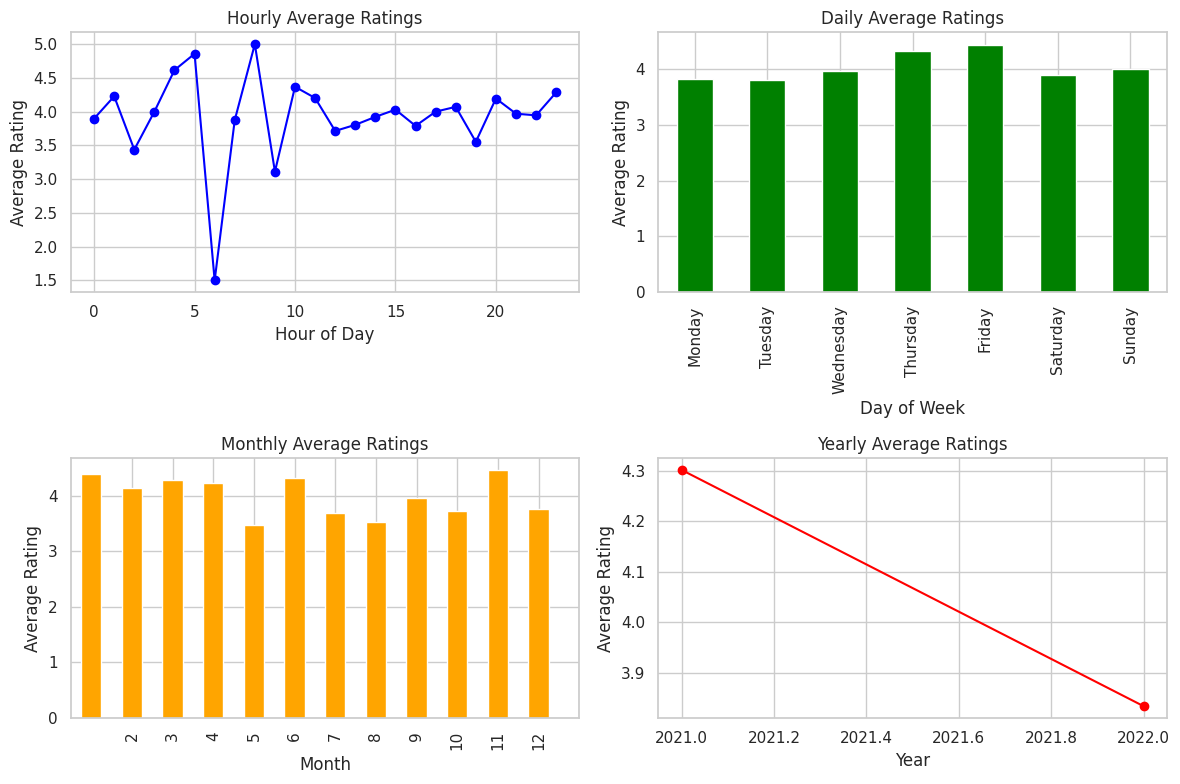

In [17]:



# Convert CreationTimestamp to datetime
train['CreationTimestamp_2'] = pd.to_datetime(train['CreationTimestamp'], unit='s')

# Extract temporal features
train['HourOfDay'] = train['CreationTimestamp_2'].dt.hour
train['DayOfWeek'] = train['CreationTimestamp_2'].dt.dayofweek
train['Month'] = train['CreationTimestamp_2'].dt.month
train['Year'] = train['CreationTimestamp_2'].dt.year

# Aggregate data based on temporal features
hourly_ratings = train.groupby('HourOfDay')['Rating'].mean()
daily_ratings = train.groupby('DayOfWeek')['Rating'].mean()
monthly_ratings = train.groupby('Month')['Rating'].mean()
yearly_ratings = train.groupby('Year')['Rating'].mean()




# Visualize the data
plt.figure(figsize=(12, 8))

# Hourly ratings
plt.subplot(2, 2, 1)
hourly_ratings.plot(kind='line', marker='o', color='blue')
plt.title('Hourly Average Ratings')
plt.xlabel('Hour of Day')
plt.ylabel('Average Rating')

# Daily ratings
plt.subplot(2, 2, 2)
daily_ratings.plot(kind='bar', color='green')
plt.title('Daily Average Ratings')
plt.xlabel('Day of Week')
plt.ylabel('Average Rating')
plt.xticks(range(7), ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Monthly ratings
plt.subplot(2, 2, 3)
monthly_ratings.plot(kind='bar', color='orange')
plt.title('Monthly Average Ratings')
plt.xlabel('Month')
plt.ylabel('Average Rating')
plt.xticks(range(1, 13))

# Yearly ratings
plt.subplot(2, 2, 4)
yearly_ratings.plot(kind='line', marker='o', color='red')
plt.title('Yearly Average Ratings')
plt.xlabel('Year')
plt.ylabel('Average Rating')

plt.tight_layout()
plt.show()

# Drop the temporal features
train.drop(['CreationTimestamp_2', 'HourOfDay', 'DayOfWeek', 'Month', 'Year'], axis=1, inplace=True)


- Hourly: The average rating starts low at around 3 and increases throughout the day, reaching a high of close to by 8 pm before settling back down towards by midnight showing the rating time.
- Daily: The average rating is lowest on Sundays at around 3 and increases throughout the week, reaching a high of over 4 on Saturdays.
- Monthly: The average rating fluctuates slightly throughout the year, with a low of around in February and a high of over 4 in September.
- Yearly: There is an overall decrease in average rating across the two years shown, from 4.3 in 2021 to 3.8 in 2022.

 ##### Target Distribution Analysis

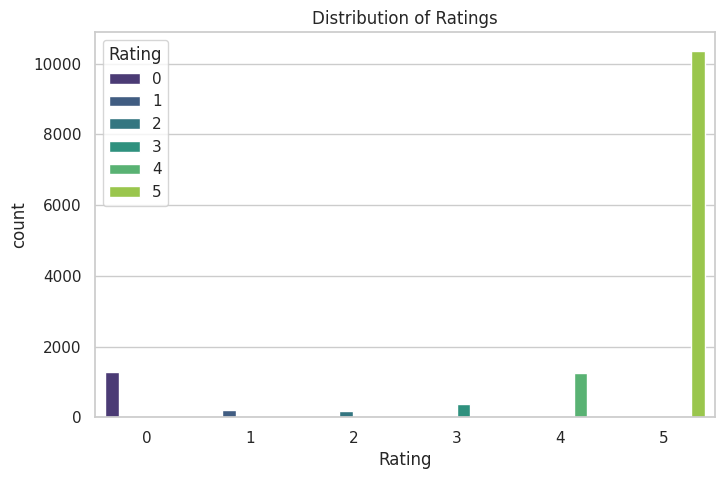

In [18]:
#target variable analysis
plt.figure(figsize=(8, 5))
sns.countplot(data=train, x='Rating', palette='viridis', hue='Rating')
plt.title('Distribution of Ratings')
plt.show()



Rating represents the overall rating of recipes. The distribution is right-skewed, suggesting that the majority of recipes have high ratings of 5 , with only a few having lower ratings.

In [19]:
numeric_columns

['ID',
 'RecipeNumber',
 'RecipeCode',
 'UserReputation',
 'CreationTimestamp',
 'ReplyCount',
 'ThumbsUpCount',
 'ThumbsDownCount',
 'BestScore']

In [20]:
bivariate_data = [ 'UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore']


In [1]:
import plotly.express as px

pair_plot_data = train[bivariate_data + ['Rating']].dropna()

for feature in bivariate_data:
    fig = px.scatter(pair_plot_data, x=feature, y='Rating', title=f'Scatter plot of {feature} vs Ratings')
    fig.update_layout(height=500, width=700)
    fig.show()

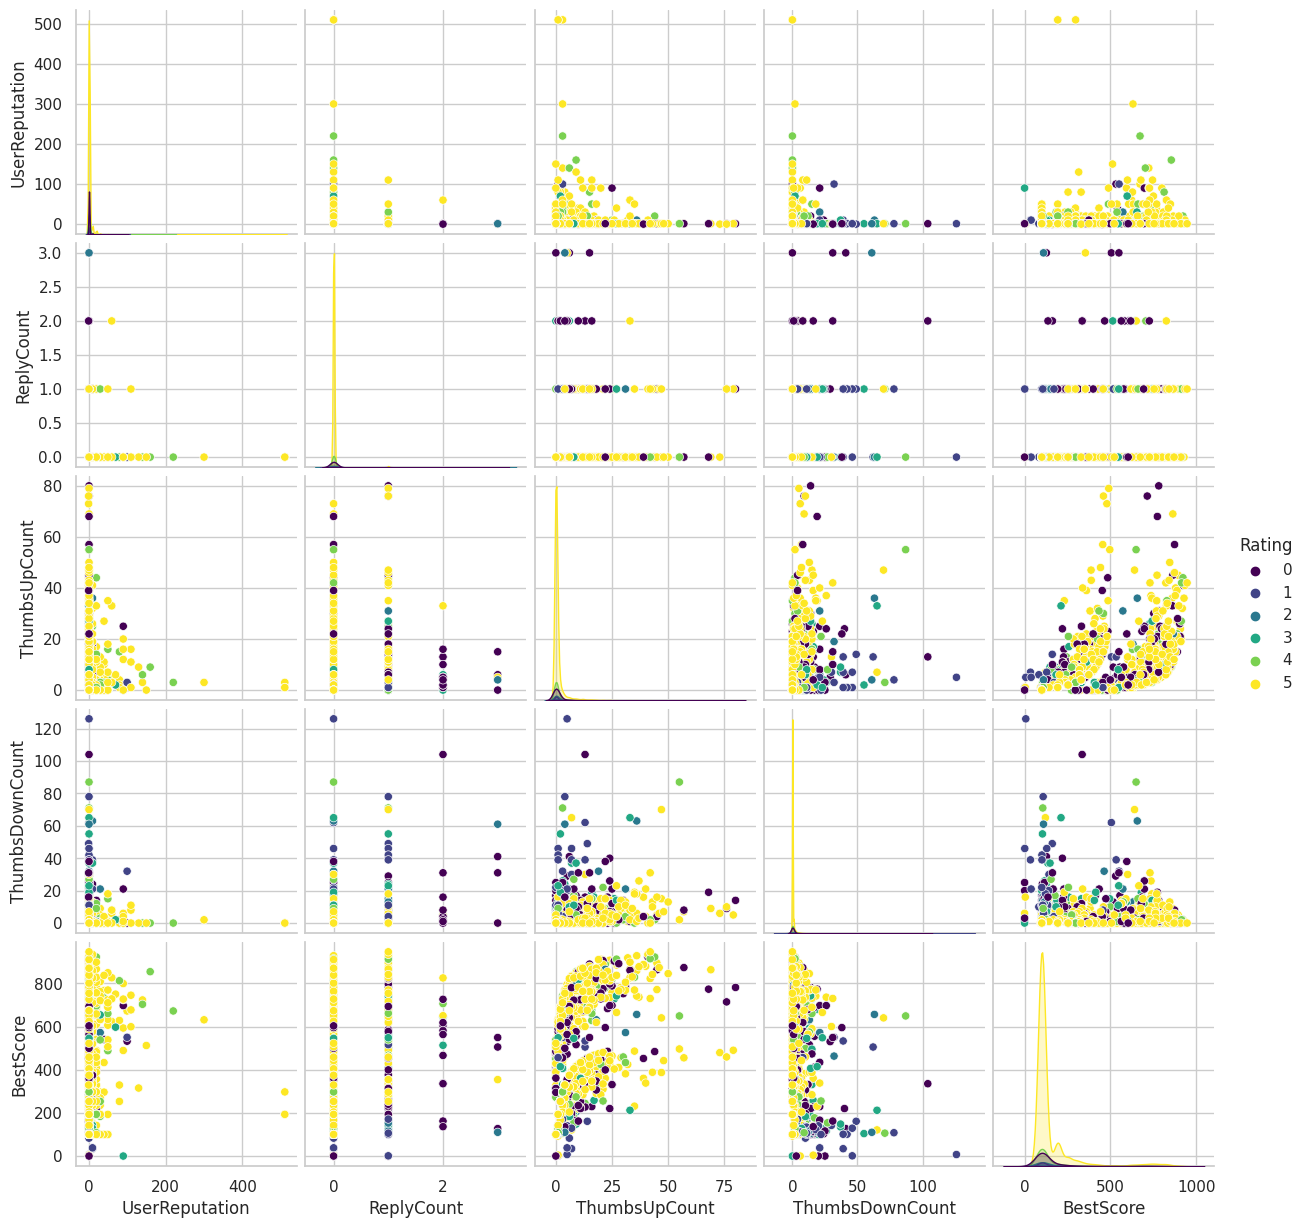

In [22]:
# pairplot between bivariate data and target variable
sns.pairplot(train[bivariate_data + ['Rating']], hue='Rating', palette='viridis')
plt.show()




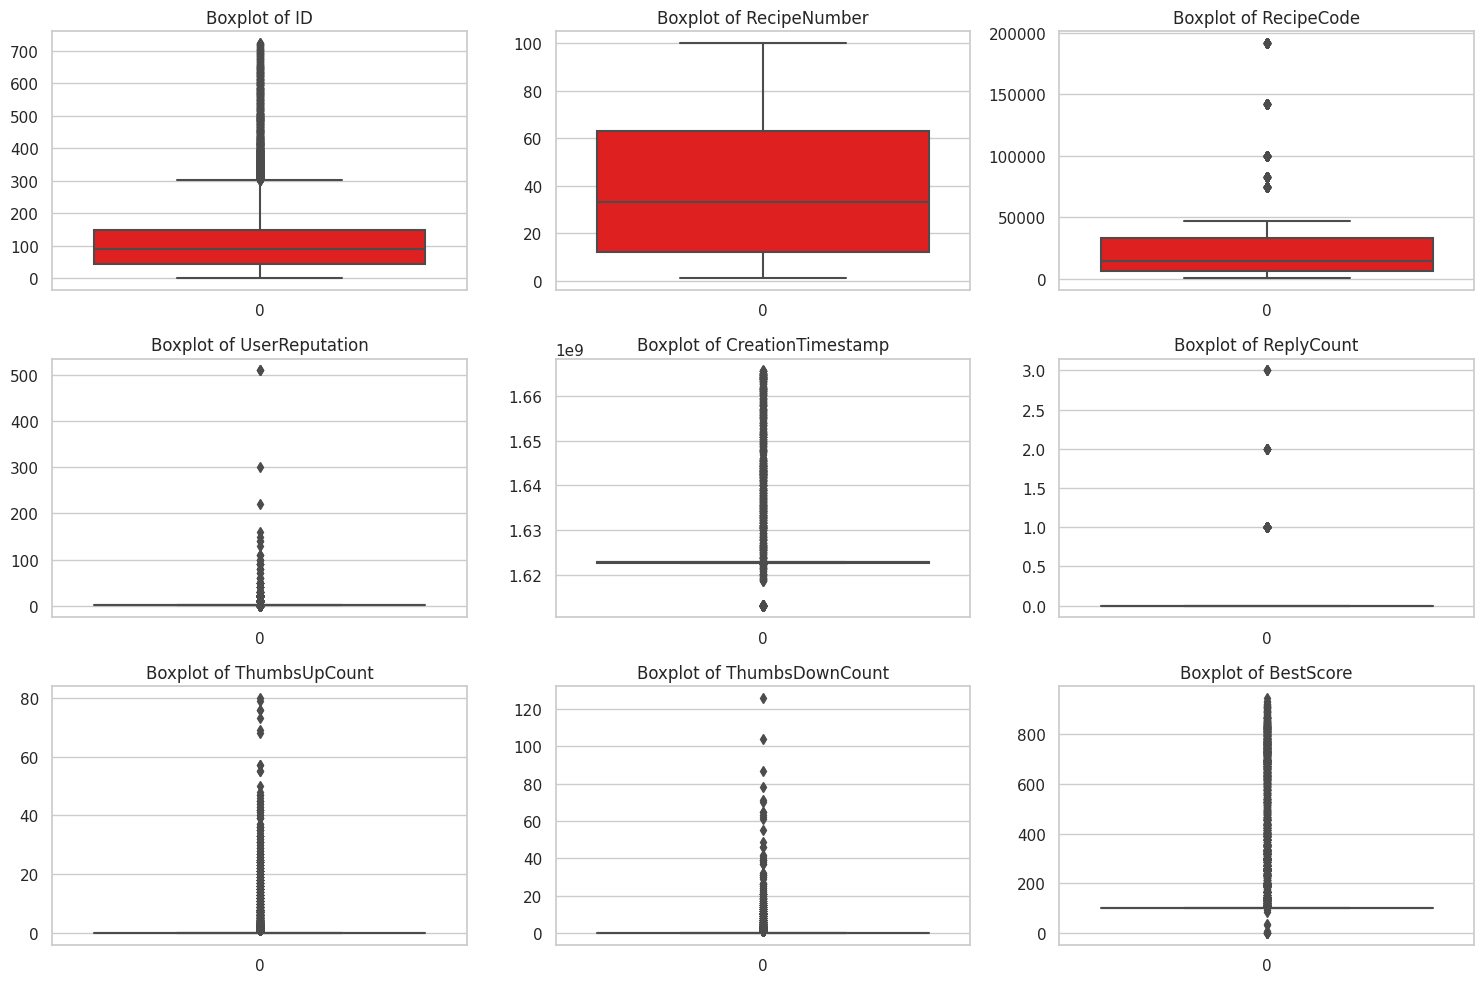

In [24]:
#Outlier detection
# Boxplot of numeric columns
plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns):
    plt.subplot(3, 3, i+1)
    sns.boxplot(train[column], color='red')
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()


**Outliers Report**
* Thumbsup count and thumbsdown count have significant amount of outliers but it is very much possible that most of the people have not give thumbs up or thumbs down.

* Similarly the reply count has significant amount of outliers but it is very much possible that most of the people have not replied.

* The user reputation has significant amount of outliers but it is very much possible that most of the people have low reputation or they may be new users.

* The best score has significant amount of outliers but it is very much possible that most of the people have not rated the recipe.

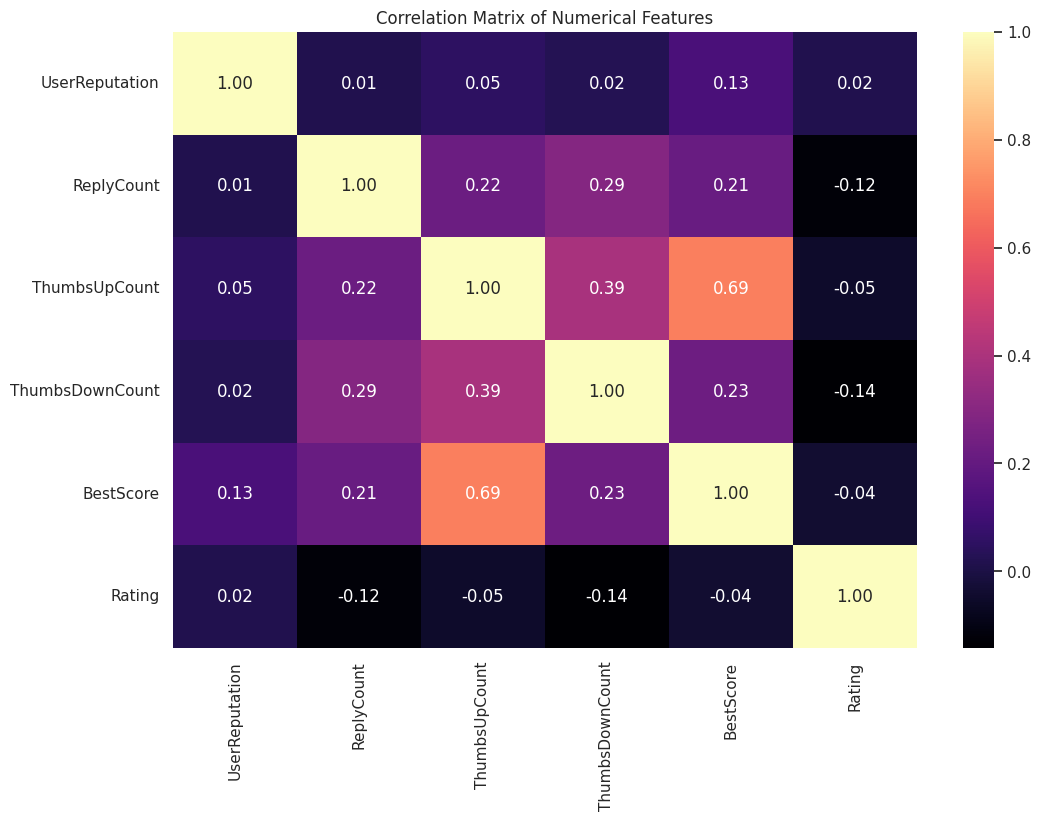

In [27]:
# Mutivariate Analysis
# Correlation Matrix with all values written in sqaure

correlation_matrix = train[bivariate_data + ['Rating']].corr()
#print(correlation_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Correlation Analysis**
- User Reputation and Best Score have a moderate positive correlation (0.127), indicating that users with higher reputation tend to provide recipes with higher scores.
- Reply Count and Thumbs Down Count have a moderate positive correlation (0.294), suggesting that recipes with more replies may also receive more thumbs down.
- Thumbs Up Count and Thumbs Down Count have a moderate positive correlation (0.393), indicating that recipes with more thumbs up may also receive more thumbs down.
- Thumbs Up Count and Best Score have a strong positive correlation (0.694), suggesting that recipes with more thumbs up tend to have higher scores.
- Reply Count and Rating have a weak negative correlation (-0.125), suggesting that recipes with more replies may have lower ratings.
- Thumbs Down Count and Rating have a weak negative correlation (-0.142), indicating that recipes with more thumbs down may have lower ratings.


### Feature Engineering

In [12]:
df = train.copy()

In [13]:
#extracting new features from the data
#total_interaction_count
df['TotalInteractionCount'] = df['ThumbsUpCount'] + df['ThumbsDownCount'] + df['ReplyCount']

In [14]:
df

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review,TotalInteractionCount
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,1622717078,0,0,0,5,100,great recipe! I have made them just as written...,0
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,1622717852,0,0,1,5,100,This is an easy and quick recipe that is great...,1
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,1622717357,0,0,0,3,100,I think I was looking for something extra spec...,0
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,1622648899,0,0,0,5,100,This is our favorite grilled chicken recipe. ...,0
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,1622718260,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13631,115,98,11767,Quick Cream of Mushroom Soup,sp_aUSaElGf_11767_c_127710,u_1oKVbHjirkAIWwTjbt9dWyqENo2,elbay,1,1622716969,0,0,0,5,100,Delicious!! Very easy to make! One minor chang...,0
13632,372,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_196030,u_1oKXoBnyJ2ocquNYwAhs19LMSrA,PauletteInhofe,1,1622717329,0,0,0,5,100,I made this pie for my family and they loved i...,0
13633,87,37,20170,Taco Lasagna,sp_aUSaElGf_20170_c_359338,u_1oKbGr5o9tj0mQl1rkVqzWnE481,Barbaralarkin,1,1622718089,0,0,0,5,100,Very tasty!,0
13634,48,63,24886,Chicken and Dumplings,sp_aUSaElGf_24886_c_175514,u_1oKWD7Dqjmc0oYHdW8Vm3fzhxJW,SammyPrissy,1,1622717192,0,0,0,5,100,I have made this numerous times. It&#39;s so ...,0


In [15]:
# INteraction Ratio
df['InteractionRatio'] = df['ThumbsUpCount'] / (df['TotalInteractionCount']+1)

In [16]:
df['InteractionRatePerComment'] = (df['ThumbsUpCount'] + df['ThumbsDownCount']) / (df['ReplyCount'] + 1)

In [18]:
df['InteractionDiversity'] = df['ThumbsDownCount'] / (df['ThumbsUpCount'] + df['ThumbsDownCount']+1)

##### Report on Extracted Features

1. **Interaction Count:**
   - Represents the total number of interactions (thumbs up, thumbs down, and replies) for each recipe.
   - Higher values may indicate more active engagement with the recipe, potentially influencing the rating.

2. **Interaction Rate per Comment:**
   - Represents the average interaction (thumbs up, thumbs down, and replies) per comment for each recipe.
   - Higher values may indicate more active engagement with the recipe, potentially influencing the rating.

3. **Interaction Diversity:**
   - Quantifies the diversity of interactions (thumbs up, thumbs down, and replies) per comment for each recipe.
   - Higher values suggest a greater variety of interactions, reflecting a diverse range of user feedback.

4. **Interaction Ratio:**
   - Represents the ratio of thumbs up to total interactions (thumbs up, thumbs down, and replies) for each recipe.
   - Higher values may indicate more active engagement with the recipe, potentially influencing the rating.


In [19]:
df.isna().sum()

ID                           0
RecipeNumber                 0
RecipeCode                   0
RecipeName                   0
CommentID                    0
UserID                       0
UserName                     0
UserReputation               0
CreationTimestamp            0
ReplyCount                   0
ThumbsUpCount                0
ThumbsDownCount              0
Rating                       0
BestScore                    0
Recipe_Review                2
TotalInteractionCount        0
InteractionRatio             0
InteractionRatePerComment    0
InteractionDiversity         0
dtype: int64

In [20]:
# Convert CreationTimestamp to datetime
df['CreationTimestamp'] = pd.to_datetime(df['CreationTimestamp'], unit='s')



In [21]:
df['CreationTimestamp']

0       2021-06-03 10:44:38
1       2021-06-03 10:57:32
2       2021-06-03 10:49:17
3       2021-06-02 15:48:19
4       2021-06-03 11:04:20
                ...        
13631   2021-06-03 10:42:49
13632   2021-06-03 10:48:49
13633   2021-06-03 11:01:29
13634   2021-06-03 10:46:32
13635   2021-06-03 10:55:03
Name: CreationTimestamp, Length: 13636, dtype: datetime64[ns]

In [22]:
# Extract temporal features
df['HourOfDay'] = df['CreationTimestamp'].dt.hour
df['DayOfWeek'] = df['CreationTimestamp'].dt.dayofweek
df['Month'] = df['CreationTimestamp'].dt.month
df['Year'] = df['CreationTimestamp'].dt.year

In [23]:
df

,ID,RecipeNumber,RecipeCode,RecipeName,CommentID,UserID,UserName,UserReputation,CreationTimestamp,ReplyCount,...,BestScore,Recipe_Review,TotalInteractionCount,InteractionRatio,InteractionRatePerComment,InteractionDiversity,HourOfDay,DayOfWeek,Month,Year
0,70,71,12259,Banana Bars with Cream Cheese Frosting,sp_aUSaElGf_12259_c_149978,u_1oKVaBmiEKwAFyiHrDLoWpbel0J,misscoffeepot,20,2021-06-03 10:44:38,0,...,100,great recipe! I have made them just as written...,0,0.0,0.0,0.0,10,3,6,2021
1,72,88,8202,Simple Taco Soup,sp_aUSaElGf_8202_c_310332,u_1oKZeRIXYzGNhGW8OMR3O4lX1ih,MichelleMalone,1,2021-06-03 10:57:32,0,...,100,This is an easy and quick recipe that is great...,1,0.0,1.0,0.5,10,3,6,2021
2,458,3,2832,Cheeseburger Soup,sp_aUSaElGf_2832_c_206522,u_1oKYHUtdaD48KJCDYq5wfpAUxWz,jeannem32,1,2021-06-03 10:49:17,0,...,100,I think I was looking for something extra spec...,0,0.0,0.0,0.0,10,3,6,2021
3,7,50,100276,Grilled Huli Huli Chicken,sp_aUSaElGf_100276_c_434088,u_1oKZCQcKQZdQhDVBS7oISc216VA,ds422,1,2021-06-02 15:48:19,0,...,100,This is our favorite grilled chicken recipe. ...,0,0.0,0.0,0.0,15,2,6,2021
4,60,12,19731,Cauliflower Soup,sp_aUSaElGf_19731_c_387011,u_1oKd4sudZQPgu6YALiC7bW7mKMs,SusanHoward,1,2021-06-03 11:04:20,0,...,100,Great basic recipe. I added 2 teaspoons Tuscan...,0,0.0,0.0,0.0,11,3,6,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13631,115,98,11767,Quick Cream of Mushroom Soup,sp_aUSaElGf_11767_c_127710,u_1oKVbHjirkAIWwTjbt9dWyqENo2,elbay,1,2021-06-03 10:42:49,0,...,100,Delicious!! Very easy to make! One minor chang...,0,0.0,0.0,0.0,10,3,6,2021
13632,372,6,21444,Favorite Chicken Potpie,sp_aUSaElGf_21444_c_196030,u_1oKXoBnyJ2ocquNYwAhs19LMSrA,PauletteInhofe,1,2021-06-03 10:48:49,0,...,100,I made this pie for my family and they loved i...,0,0.0,0.0,0.0,10,3,6,2021
13633,87,37,20170,Taco Lasagna,sp_aUSaElGf_20170_c_359338,u_1oKbGr5o9tj0mQl1rkVqzWnE481,Barbaralarkin,1,2021-06-03 11:01:29,0,...,100,Very tasty!,0,0.0,0.0,0.0,11,3,6,2021
13634,48,63,24886,Chicken and Dumplings,sp_aUSaElGf_24886_c_175514,u_1oKWD7Dqjmc0oYHdW8Vm3fzhxJW,SammyPrissy,1,2021-06-03 10:46:32,0,...,100,I have made this numerous times. It&#39;s so ...,0,0.0,0.0,0.0,10,3,6,2021


In [24]:
columns_to_drop = ['ID','CreationTimestamp', 'CommentID', 'UserID', 'UserName']

# Drop the columns from the DataFrame
train_cleaned = df.drop(columns=columns_to_drop)

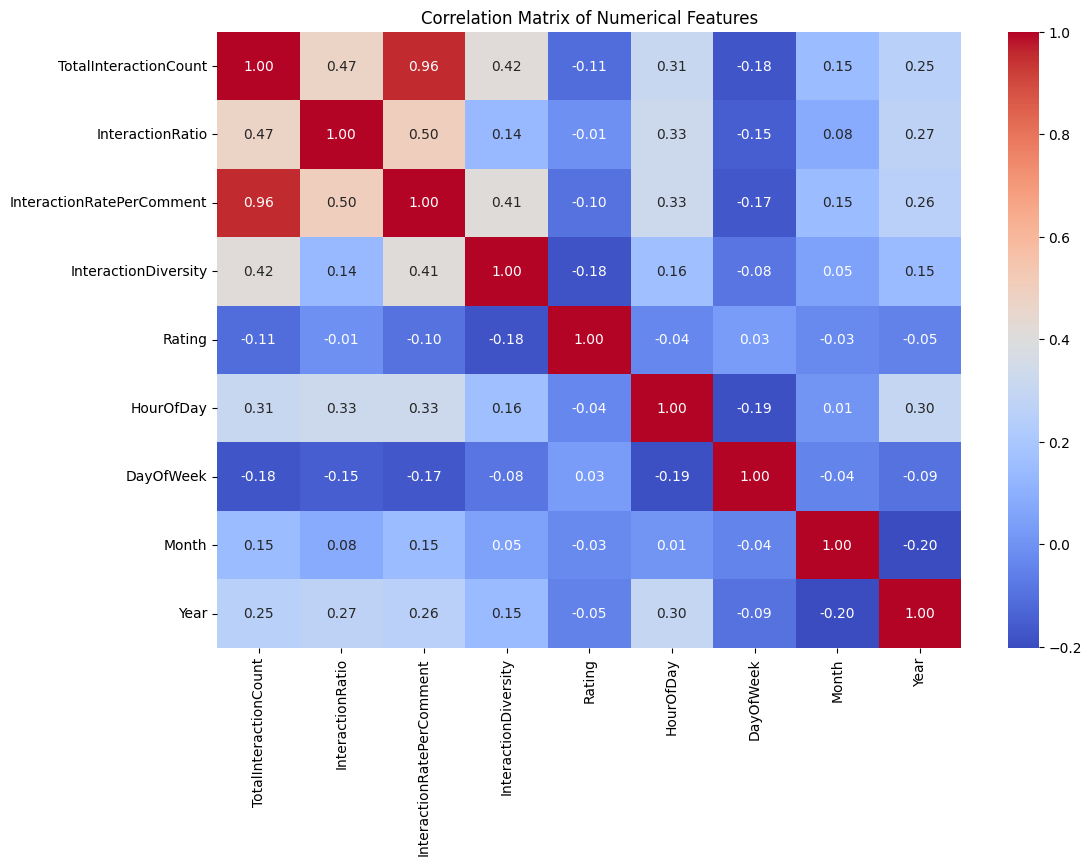

In [25]:
new_columns = ['TotalInteractionCount', 'InteractionRatio', 'InteractionRatePerComment', 'InteractionDiversity', 'Rating', 'HourOfDay', 'DayOfWeek', 'Month', 'Year']

#correlation matrix
correlation_matrix = df[new_columns].corr()
#print(correlation_matrix)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()



#### Report on Correlation Matrix with New Columns

1. **Total Interaction Count:**
   - Strong positive correlation with Interaction Rate per Comment (0.957) and moderate positive correlation with Interaction Ratio (0.472).
   - Indicates that recipes with more total interactions tend to have higher interaction rates per comment and ratios.

2. **Interaction Ratio:**
   - Moderate positive correlation with Total Interaction Count (0.472) and weak positive correlation with Interaction Rate per Comment (0.500).
   - Suggests that recipes with higher interaction ratios may also have more total interactions.

3. **Interaction Rate per Comment:**
   - Strong positive correlation with Total Interaction Count (0.957) and moderate positive correlation with Interaction Ratio (0.500).
   - Implies that recipes with higher interaction rates per comment tend to have more total interactions.

4. **Interaction Diversity:**
   - Weak positive correlation with Total Interaction Count (0.417) and weak negative correlation with Rating (-0.180).
   - Indicates that recipes with more diverse interactions may not necessarily have higher ratings.

5. **Temporal Features:**
   - Weak correlations with other variables, suggesting limited influence on interaction patterns or ratings.
   - Hour of Day shows a slight positive correlation with Interaction Ratio (0.328) and Total Interaction Count (0.309), possibly indicating peak activity times for recipe engagement.
   - Day of Week and Month have weak correlations with other variables, implying less influence on interaction or rating patterns.


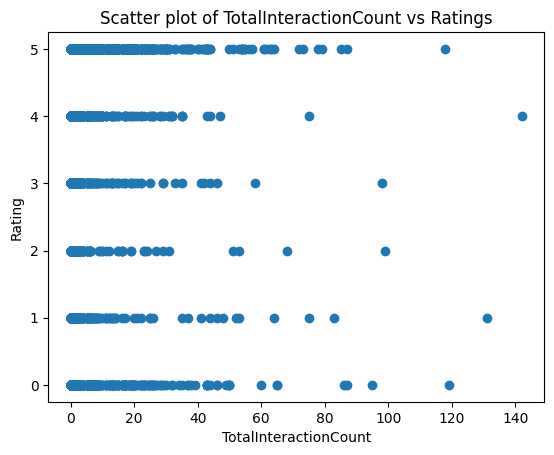

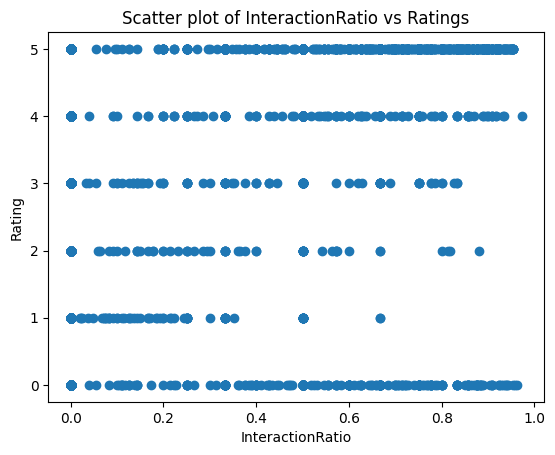

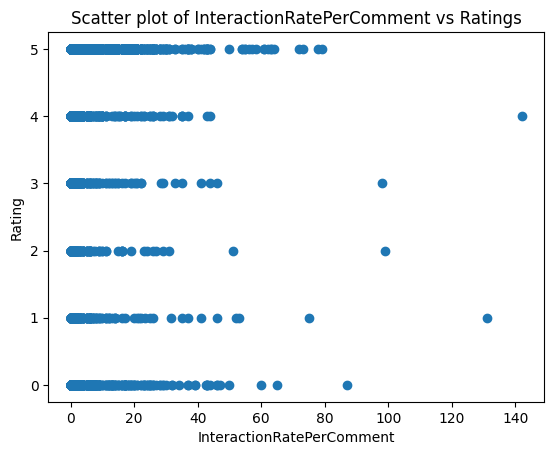

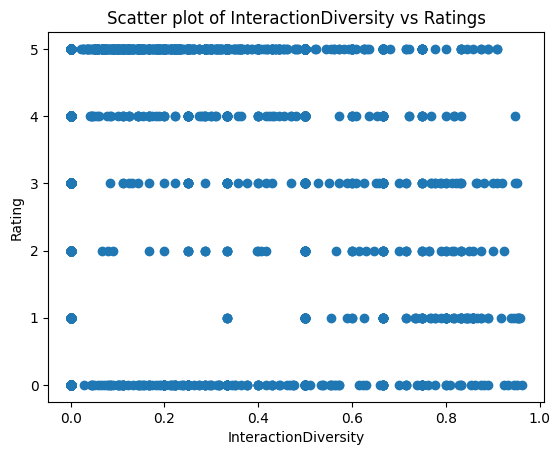

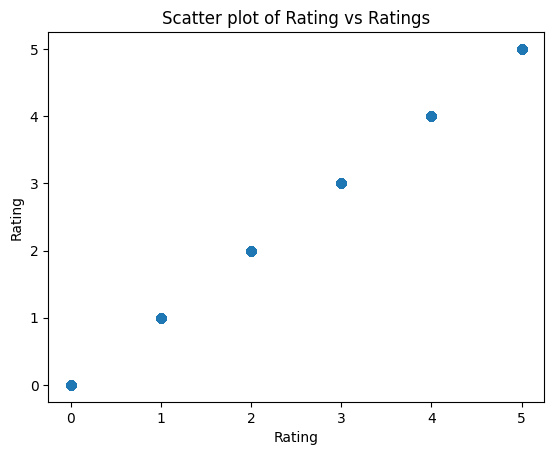

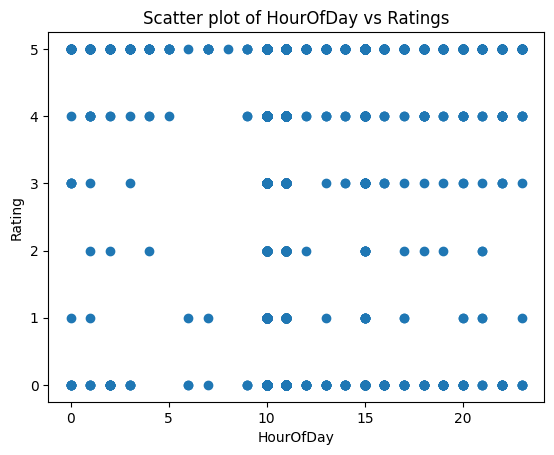

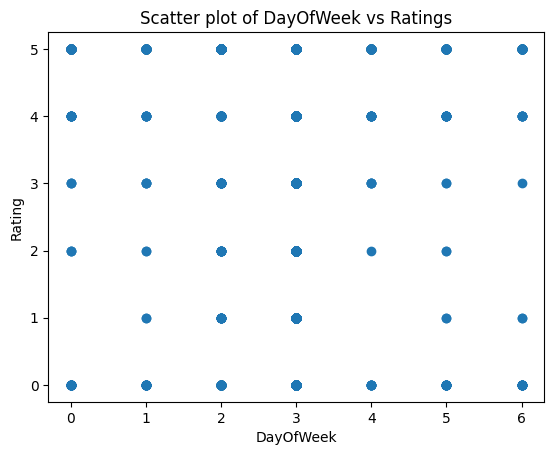

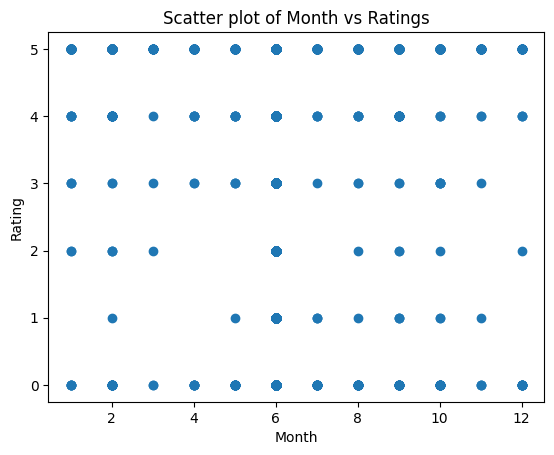

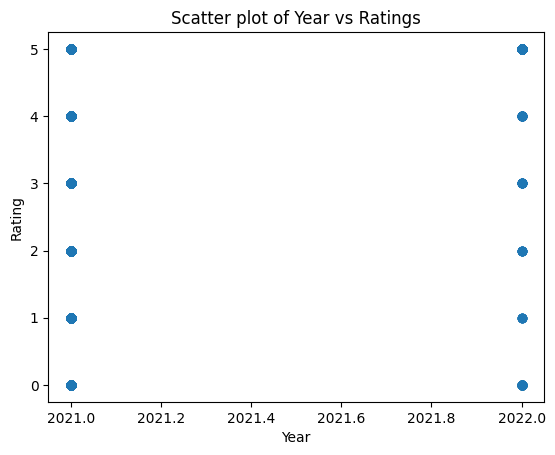

In [15]:
for i in new_columns:
    plt.scatter(df[i],df['Rating'])
    plt.xlabel(i)
    plt.ylabel('Rating')
    plt.title(f'Scatter plot of {i} vs Ratings')
    plt.show()


In [27]:
#dropping temporal features and useless columns
use_less_columns = ['ID','CreationTimestamp', 'CommentID', 'UserID', 'UserName','Year','Month','DayOfWeek','HourOfDay']

In [28]:
#dropping
df = df.drop(columns=use_less_columns,axis=1)

In [29]:
#dropping RecipeName
df = df.drop(columns=['RecipeName'],axis=1)
df

,RecipeNumber,RecipeCode,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review,TotalInteractionCount,InteractionRatio,InteractionRatePerComment,InteractionDiversity
0,71,12259,20,0,0,0,5,100,great recipe! I have made them just as written...,0,0.0,0.0,0.0
1,88,8202,1,0,0,1,5,100,This is an easy and quick recipe that is great...,1,0.0,1.0,0.5
2,3,2832,1,0,0,0,3,100,I think I was looking for something extra spec...,0,0.0,0.0,0.0
3,50,100276,1,0,0,0,5,100,This is our favorite grilled chicken recipe. ...,0,0.0,0.0,0.0
4,12,19731,1,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13631,98,11767,1,0,0,0,5,100,Delicious!! Very easy to make! One minor chang...,0,0.0,0.0,0.0
13632,6,21444,1,0,0,0,5,100,I made this pie for my family and they loved i...,0,0.0,0.0,0.0
13633,37,20170,1,0,0,0,5,100,Very tasty!,0,0.0,0.0,0.0
13634,63,24886,1,0,0,0,5,100,I have made this numerous times. It&#39;s so ...,0,0.0,0.0,0.0


In [30]:
df = df.drop('RecipeNumber',axis=1)

In [31]:
df

,RecipeCode,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review,TotalInteractionCount,InteractionRatio,InteractionRatePerComment,InteractionDiversity
0,12259,20,0,0,0,5,100,great recipe! I have made them just as written...,0,0.0,0.0,0.0
1,8202,1,0,0,1,5,100,This is an easy and quick recipe that is great...,1,0.0,1.0,0.5
2,2832,1,0,0,0,3,100,I think I was looking for something extra spec...,0,0.0,0.0,0.0
3,100276,1,0,0,0,5,100,This is our favorite grilled chicken recipe. ...,0,0.0,0.0,0.0
4,19731,1,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13631,11767,1,0,0,0,5,100,Delicious!! Very easy to make! One minor chang...,0,0.0,0.0,0.0
13632,21444,1,0,0,0,5,100,I made this pie for my family and they loved i...,0,0.0,0.0,0.0
13633,20170,1,0,0,0,5,100,Very tasty!,0,0.0,0.0,0.0
13634,24886,1,0,0,0,5,100,I have made this numerous times. It&#39;s so ...,0,0.0,0.0,0.0


In [3]:
df['Recipe_Review'] = df['Recipe_Review'].fillna(' ')

In [2]:
df['Recipe_Review'].isna().sum()

0

In [3]:
df

,RecipeCode,UserReputation,ReplyCount,ThumbsUpCount,ThumbsDownCount,Rating,BestScore,Recipe_Review,TotalInteractionCount,InteractionRatio,InteractionRatePerComment,InteractionDiversity
0,12259,20,0,0,0,5,100,great recipe! I have made them just as written...,0,0.0,0.0,0.0
1,8202,1,0,0,1,5,100,This is an easy and quick recipe that is great...,1,0.0,1.0,0.5
2,2832,1,0,0,0,3,100,I think I was looking for something extra spec...,0,0.0,0.0,0.0
3,100276,1,0,0,0,5,100,This is our favorite grilled chicken recipe. ...,0,0.0,0.0,0.0
4,19731,1,0,0,0,4,100,Great basic recipe. I added 2 teaspoons Tuscan...,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
13631,11767,1,0,0,0,5,100,Delicious!! Very easy to make! One minor chang...,0,0.0,0.0,0.0
13632,21444,1,0,0,0,5,100,I made this pie for my family and they loved i...,0,0.0,0.0,0.0
13633,20170,1,0,0,0,5,100,Very tasty!,0,0.0,0.0,0.0
13634,24886,1,0,0,0,5,100,I have made this numerous times. It&#39;s so ...,0,0.0,0.0,0.0


In [15]:
#splitting the data
X = df.drop('Rating',axis=1)
y = df['Rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((10908, 11), (2728, 11), (10908,), (2728,))

In [53]:

text_col = ['Recipe_Review']

numeric_col = ['UserReputation', 'ReplyCount', 'ThumbsUpCount', 'ThumbsDownCount', 'BestScore', 'TotalInteractionCount', 'InteractionRatio', 'InteractionRatePerComment', 'InteractionDiversity',]

categoric_col = ['RecipeCode']

In [1]:
print(X_train.columns)


Index(['RecipeCode', 'UserReputation', 'ReplyCount', 'ThumbsUpCount',
       'ThumbsDownCount', 'BestScore', 'Recipe_Review',
       'TotalInteractionCount', 'InteractionRatio',
       'InteractionRatePerComment', 'InteractionDiversity'],
      dtype='object')


In [4]:
cat_processor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categoric_col)
    ])

#standard scaling  for numeric columns
numeric_processor = ColumnTransformer(
    transformers=[
        ('num_scaler', StandardScaler(with_mean=False), numeric_col)
    ])

#text processor for text column
text_processor = ColumnTransformer(
    transformers=[
        ('text', TfidfVectorizer(stop_words='english',ngram_range=(1,2)), text_col[0])
    ])

full_processor = FeatureUnion(transformer_list=[
    ('cat_processor', cat_processor),
    ('numeric_processor', numeric_processor),
    ('text_processor', text_processor)
])

full_processor

FeatureUnion(transformer_list=[('cat_processor',
                                ColumnTransformer(transformers=[('cat',
                                                                 OneHotEncoder(),
                                                                 ['RecipeCode'])])),
                               ('numeric_processor',
                                ColumnTransformer(transformers=[('num_scaler',
                                                                 StandardScaler(),
                                                                 ['UserReputation',
                                                                  'ReplyCount',
                                                                  'ThumbsUpCount',
                                                                  'ThumbsDownCount',
                                                                  'BestScore',
                                                                  'TotalInteractionCount',
                                                                  'InteractionRatio',
                                                                  'InteractionRatePerComment',
                                                                  'InteractionDiversity'])])),
                               ('text_processor',
                                ColumnTransformer(transformers=[('text',
                                                                 TfidfVectorizer(ngram_range=(1,
                                                                                              2),
                                                                                 stop_words='english'),
                                                                 'Recipe_Review')]))])

#### Report on Data Processor

The data processor pipeline was designed to preprocess the raw data before feeding it into machine learning models. Here's a summary of the steps involved:

1. **Categorical Data Processing:**
   - Utilized OneHotEncoder to convert categorical variables into binary vectors, facilitating the representation of categorical data in machine learning models.
   - Applied to columns containing categorical features such as Recipe Code and Recipe Number.

2. **Numeric Data Processing:**
   - Passed through numeric columns unchanged, ensuring that their original values are preserved.
   - This approach is suitable for numeric features like User Reputation, Thumbs Up Count, and Thumbs Down Count.

3. **Text Data Processing:**
   - Employed TF-IDF vectorization with TfidfVectorizer to transform text reviews into numerical representations.
   - Removed English stopwords and considered both unigrams and bigrams to capture relevant information from text data effectively.

4. **Feature Union:**
   - Combined the outputs of the categorical, numeric, and text processors using FeatureUnion.
   - This integration enables the seamless integration of processed data from different sources into a unified dataset.




### Model Building

* Now these steps are applied to the training data to build the model.
* The processor pipeline is designed to preprocess the raw data before feeding it into machine learning    models.
* The pipeline is then  trained on the training data and evaluated on the test data to assess the        performance of the model.


In [ ]:

pipeline0 = Pipeline(steps=[('full_processor', full_processor),
                                ('model',LogisticRegression(multi_class='multinomial', solver='saga',max_iter=10000))
                            ])

pipeline0.fit(X_train, y_train)



In [10]:
X_test = pipeline0[0].transform(X_test)
y_pred = pipeline0[1].predict(X_test)

logreg_score = accuracy_score(y_test, y_pred)

print(logreg_score)

0.7554985337243402


The very first model is a Logistic Regression model with a multinomial output and a solver of 'saga'.
It gains an **accuracy score of 0.755** on the evaluation set.

In [ ]:

pipeline1 = Pipeline(steps=[('full_processor', full_processor),  
                                ('model',SGDClassifier(loss='log',max_iter=10000))
                            ])

pipeline1.fit(X_train, y_train)



In [12]:
X_test = pipeline1[0].transform(X_test)
y_pred = pipeline1[1].predict(X_test)

sgd_score = accuracy_score(y_test, y_pred)

print(sgd_score)

0.7664956011730205


The second model is a Stochastic Gradient Descent Classifier with a loss of 'log_loss' and a maximum number of iterations of 10000. It gains an **accuracy score of 0.766** on the evaluation set.

In [49]:
pipeline1[1].__dict__

{'loss': 'log',
 'penalty': 'l2',
 'learning_rate': 'optimal',
 'epsilon': 0.1,
 'alpha': 0.0001,
 'C': 1.0,
 'l1_ratio': 0.15,
 'fit_intercept': True,
 'shuffle': True,
 'random_state': None,
 'verbose': 0,
 'eta0': 0.0,
 'power_t': 0.5,
 'early_stopping': False,
 'validation_fraction': 0.1,
 'n_iter_no_change': 5,
 'warm_start': False,
 'average': False,
 'max_iter': 10000,
 'tol': 0.001,
 'class_weight': None,
 'n_jobs': None,
 'coef_': array([[-5.52650537e+000,  1.57794161e+000, -5.04426615e-001, ...,
         -1.55650685e-002, -3.42662657e-003, -1.28245248e-002],
        [ 1.31064705e+000,  7.13859579e-001,  2.96426732e+000, ...,
         -2.96531451e-003, -3.09602075e-003, -4.16831536e-014],
        [ 2.21494877e+000,  8.12352297e-001,  5.50075139e-001, ...,
         -1.39328929e-017, -7.47408735e-108, -1.45470321e-017],
        [ 3.23117426e-001, -4.24285705e-001, -2.27639371e+000, ...,
         -3.45169204e-003, -1.85923060e-003, -1.74460641e-003],
        [-1.86915694e+000, -1

In [50]:

pipeline2 = Pipeline(steps=[('full_processor', full_processor),
                                ('model',SGDClassifier(loss='log_loss'))
                            ])

param_grid = {
    'model__alpha': [0.0001,0.001,0.1, 1],
    'model__penalty': ['l1', 'l2', 'elasticnet'],
    'model__l1_ratio': [0.1, 0.5],
    'model__max_iter': [10000]
}

grid_search = GridSearchCV(pipeline2, param_grid,n_jobs=-1, cv=5, scoring='accuracy',verbose=2)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)



Fitting 5 folds for each of 24 candidates, totalling 120 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


{'model__alpha': 0.001, 'model__l1_ratio': 0.1, 'model__max_iter': 10000, 'model__penalty': 'elasticnet'}
0.7576979472140762
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__max_iter=10000, model__penalty=l1; total time=   5.9s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__max_iter=10000, model__penalty=l2; total time=   3.8s
[CV] END model__alpha=0.0001, model__l1_ratio=0.1, model__max_iter=10000, model__penalty=elasticnet; total time=   8.6s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__max_iter=10000, model__penalty=l1; total time=   5.4s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__max_iter=10000, model__penalty=l1; total time=   5.7s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__max_iter=10000, model__penalty=l2; total time=   3.8s
[CV] END model__alpha=0.0001, model__l1_ratio=0.5, model__max_iter=10000, model__penalty=elasticnet; total time=   7.0s
[CV] END model__alpha=0.001, model__l1_ratio=0.1, model__max_iter=10000, mo

In [15]:
y_pred = grid_search.predict(X_test)

sgd_grid_score = 0.757 # as calculated from the grid search above

print(sgd_grid_score)

0.7664956011730205


Tried a grid search to find the best parameters for the model on the SGD Classifier.
The best parameters are: alpha=1, l1_ratio=0.1, max_iter=10000, penalty='l2'.
Got an **accuracy score of 0.757** on the evaluation set using the best parameters.


In [14]:

pipeline3 = Pipeline(steps=[('full_processor', full_processor),
                                ('model',RidgeClassifier(alpha=1))
                            ])

pipeline3.fit(X_train, y_train)

X_test = pipeline3[0].transform(X_test)
ridge_pred = pipeline3[1].predict(X_test)

ridge_score = accuracy_score(y_test, ridge_pred)

print(ridge_score)

0.7712609970674487


The third model is a Ridge Classifier with an alpha value of 1. It gains an **accuracy score of 0.771** on the evaluation set which is quite good. 

In [8]:
# Using RandomOverSampler and RandomUnderSampler for balancing the dataset
ratios  = np.array([2000,1000,1000,1000,2000,6000])/np.bincount(y_train)

def over_sampling_strategy(y):
    class_counts = np.bincount(y)
    sampling_strategy = {}
    for i, ratio in enumerate(ratios[:-1]):
        sampling_strategy[i] = int(class_counts[i] * ratio)
    return sampling_strategy

def under_sampling_strategy(y):
    class_counts = np.bincount(y)
    sampling_strategy = {5: int(ratios[-1]*class_counts[5])}
    return sampling_strategy

In [ ]:
pipeline_4 = imbpipeline.Pipeline(steps=[('full_processor', full_processor),
                                ('over_sampler', RandomOverSampler(sampling_strategy=over_sampling_strategy)),  # Over-sampling
                                ('under_sampler', RandomUnderSampler(sampling_strategy=under_sampling_strategy)), # Under-sampling
                                ('model',RidgeClassifier(alpha=5))
                            ])

pipeline_4.fit(X_train, y_train)

# X_test = pipeline_4[0].transform(X_test)


In [21]:
y_pred = pipeline_4.predict(X_test)

ridge_balanced_score = accuracy_score(y_test, y_pred)

print(ridge_balanced_score)

0.7694281524926686


Tried using RandomOverSampler and RandomUnderSampler for balancing the dataset.
The model with the best accuracy score is the model with an alpha value of 5.
Got an **accuracy score of 0.769** on the evaluation set which is the best so far.


In [ ]:
pipeline5 = imbpipeline.Pipeline(steps=[('full_processor', full_processor),
                                ('over_sampler', RandomOverSampler(sampling_strategy=over_sampling_strategy)),  # Over-sampling
                                ('under_sampler', RandomUnderSampler(sampling_strategy=under_sampling_strategy)), # Under-sampling
                                ('model',MultinomialNB())
                            ])

pipeline5.fit(X_train, y_train)



In [24]:
X_test = pipeline5[0].transform(X_test)
y_pred = pipeline5[3].predict(X_test)

multinomialNB_score = accuracy_score(y_test, y_pred)

print(multinomialNB_score)

0.7562316715542522


In [ ]:
pipeline6 = imbpipeline.Pipeline(steps=[('full_processor', full_processor),
                                ('over_sampler', RandomOverSampler(sampling_strategy=over_sampling_strategy)),  # Over-sampling
                                ('under_sampler', RandomUnderSampler(sampling_strategy=under_sampling_strategy)), # Under-sampling
                                ('model',GaussianNB())
                            ])

pipeline5.fit(X_train, y_train)


In [26]:

X_test = pipeline5[0].transform(X_test)
y_pred = pipeline5[3].predict(X_test)

gaussianNB_score = accuracy_score(y_test, y_pred)

print(gaussianNB_score)

0.7562316715542522


Using RandomOverSampler and RandomUnderSampler for balancing the dataset, I tried GaussianNB and MultinomialNB.
The model with the best accuracy score is the model with GaussianNB.
Got an **accuracy score of 0.756** on the evaluation set.

In [ ]:
# Decision Tree Classifier
pipeline7 = imbpipeline.Pipeline(steps=[('full_processor', full_processor),
                                ('over_sampler', RandomOverSampler(sampling_strategy=over_sampling_strategy)),  # Over-sampling
                                ('under_sampler', RandomUnderSampler(sampling_strategy=under_sampling_strategy)), # Under-sampling
                                ('model',DecisionTreeClassifier())
                            ])

param_grid = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2,3, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    
}

grid_search = GridSearchCV(pipeline7, param_grid,n_jobs=-1, cv=5, scoring='accuracy',verbose=2)
grid_search.fit(X_train, y_train)





In [31]:
print(grid_search.best_params_)

y_pred = grid_search.predict(X_test)

dec_tree_score = accuracy_score(y_test, y_pred)

print(dec_tree_score)

0.7221546896464145


Used a grid search to find the best parameters for the model on the Decision Tree Classifier.
The best parameters are: criterion='gini', max_depth=None, min_samples_leaf=1, min_samples_split=2.
Got an **accuracy score of 0.722** on the evaluation set using the best parameters.

In [ ]:
#LinearSVC

pipeline8 = imbpipeline.Pipeline(steps=[('full_processor', full_processor),
                                ('over_sampler', RandomOverSampler(sampling_strategy=over_sampling_strategy)),  # Over-sampling
                                ('under_sampler', RandomUnderSampler(sampling_strategy=under_sampling_strategy)), # Under-sampling
                                ('model',LinearSVC(C=1,dual=True))
                            ])

pipeline8.fit(X_train, y_train)

X_test = pipeline8[0].transform(X_test)
y_pred = pipeline8[3].predict(X_test)



In [30]:
linearSVC_score = accuracy_score(y_test, y_pred)

print(linearSVC_score)

0.7543988269794721


Used a grid search to find the best parameters for the model on the LinearSVC.
The best parameters are: C=1, dual=True.
Got an **accuracy score of 0.754** on the evaluation set using the best parameters.


In [ ]:
# Non Linear SVC

pipeline9 = imbpipeline.Pipeline(steps=[('full_processor', full_processor),
                                ('over_sampler', RandomOverSampler(sampling_strategy=over_sampling_strategy)),  # Over-sampling
                                ('under_sampler', RandomUnderSampler(sampling_strategy=under_sampling_strategy)), # Under-sampling
                                ('model',SVC())
                            ])
param_grid = {'model__C': [0.01, 1, 10],
              'model__gamma': [0.001, 0.01, 0.1, 1],
              'model__kernel': ['rbf', 'poly'],  
              'model__degree': [2, 3]}

grid_search = GridSearchCV(pipeline9, param_grid,n_jobs=-1, cv=3, scoring='accuracy',verbose=2)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)

y_pred = grid_search.predict(X_test)

print(accuracy_score(y_test, y_pred))



Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [ ]:
#RBF SVC

pipeline10 = imbpipeline.Pipeline(steps=[('full_processor', full_processor),
                                ('over_sampler', RandomOverSampler(sampling_strategy=over_sampling_strategy)),  # Over-sampling
                                ('under_sampler', RandomUnderSampler(sampling_strategy=under_sampling_strategy)), # Under-sampling
                                ('model',SVC(kernel='rbf', gamma=1, random_state=42,C=10))
                            ])

pipeline10.fit(X_train, y_train)



In [ ]:
X_test = pipeline10[0].transform(X_test)
y_pred = pipeline10[3].predict(X_test)

SVC_rbf_score = accuracy_score(y_test, y_pred)

print(SVC_rbf_score)

Built a pipeline with the best parameters for the model on the RBF SVC.
The best parameters are: C=10, gamma=1, kernel='rbf'.
Got an **accuracy score of 0.760** on the evaluation set using the best parameters.

In [ ]:
pipeline11 = imbpipeline.Pipeline(steps=[('full_processor', full_processor),
                            ('over_sampler', RandomOverSampler(sampling_strategy=over_sampling_strategy)),  # Over-sampling
                                ('under_sampler', RandomUnderSampler(sampling_strategy=under_sampling_strategy)), # Under-sampling
                            ('model',SVC(random_state=42,kernel='poly',degree=2))])


pipeline11.fit(X_train, y_train)



In [33]:
X_test = pipeline11[0].transform(X_test)
y_pred = pipeline11[3].predict(X_test)

SVC_poly_score = accuracy_score(y_test, y_pred)

print(SVC_poly_score)


0.7551319648093842


Tried the SVC model again with the polynomial kernel of degree 2.
The best parameters are: C=1, degree=2, kernel='poly'.
Got an **accuracy score of 0.755** on the evaluation set using the best parameters.

In [4]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 10, 20],
    'model__bootstrap': [True, False]
    
    
    
}

In [5]:
pipeline_rf = imbpipeline.Pipeline(steps=[('full_processor', full_processor),
                                          ('over_sampler', RandomOverSampler(sampling_strategy=over_sampling_strategy)),  # Over-sampling
                                ('under_sampler', RandomUnderSampler(sampling_strategy=under_sampling_strategy)), # Under-sampling
                            ('model',RandomForestClassifier())])


grid = GridSearchCV(estimator=pipeline_rf, param_grid=param_grid, n_jobs=-1, cv=5,verbose=1, scoring='accuracy')
grid.fit(X_train, y_train)




Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('full_processor',
                                        FeatureUnion(transformer_list=[('cat_processor',
                                                                        ColumnTransformer(transformers=[('cat',
                                                                                                         OneHotEncoder(),
                                                                                                         ['RecipeCode'])])),
                                                                       ('numeric_processor',
                                                                        ColumnTransformer(transformers=[('num',
                                                                                                         'passthrough',
                                                                                                         ['UserReputation',
                                                                                                          'ReplyCount',
                                                                                                          'ThumbsUpCount',
                                                                                                          'ThumbsDownCount',
                                                                                                          'BestScore',
                                                                                                          'TotalInteracti...
                                        RandomOverSampler(sampling_strategy=<function over_sampling_strategy at 0x79ef3c362dd0>)),
                                       ('under_sampler',
                                        RandomUnderSampler(sampling_strategy=<function under_sampling_strategy at 0x79ef3c362e60>)),
                                       ('model', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'model__bootstrap': [True, False],
                         'model__max_depth': [None, 10, 20],
                         'model__n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

In [17]:
print(grid.best_params_)

rf_pred = grid.predict(X_test)

randomForest_score = accuracy_score(y_test, rf_pred)
print(randomForest_score)

{'model__bootstrap': True, 'model__max_depth': None, 'model__n_estimators': 300}
0.7657624633431085


Used a grid search to find the best parameters for the model on the Random Forest Classifier.
The best parameters are: bootstrap=True, max_depth=None, n_estimators=300.
Got an **accuracy score of 0.765** on the evaluation set using the best parameters.


In [ ]:
pipelined_gbcf = imbpipeline.Pipeline(steps=[('full_processor', full_processor),
                            ('over_sampler', RandomOverSampler(sampling_strategy=over_sampling_strategy)),  # Over-sampling
                                ('under_sampler', RandomUnderSampler(sampling_strategy=under_sampling_strategy)), # Under-sampling
                            ('model',GradientBoostingClassifier())])

pipelined_gbcf.fit(X_train, y_train)




In [38]:
y_pred = pipelined_gbcf.predict(X_test)

gbcf_score = accuracy_score(y_test, y_pred)

print(gbcf_score)

0.7587976539589443


Tried Gradient Boosting Classifier with the default parameters.
Got an **accuracy score of 0.758** on the evaluation set.

In [ ]:
pipeline_ada = imbpipeline.Pipeline(steps=[('full_processor', full_processor),
                            ('over_sampler', RandomOverSampler(sampling_strategy=over_sampling_strategy)),  # Over-sampling
                                ('under_sampler', RandomUnderSampler(sampling_strategy=under_sampling_strategy)), # Under-sampling
                            ('model',AdaBoostClassifier(random_state=42))])

pipeline_ada.fit(X_train, y_train)



In [39]:
y_pred = pipeline_ada.predict(X_test)

ada_score = accuracy_score(y_test, y_pred)

print(ada_score)

0.7591642228739003


Tried Ada Boost Classifier with the default parameters.
Got an **accuracy score of 0.734** on the evaluation set.

In [ ]:
pipeline_xgb = Pipeline(steps=[('full_processor', full_processor),
                            ('model',XGBClassifier(random_state=42))])

pipeline_xgb.fit(X_train, y_train)



In [11]:
y_pred = pipeline_xgb.predict(X_test)

xgb_pred = pipeline_xgb.predict(X_test)

XGB_score = accuracy_score(y_test, y_pred)


print(XGB_score)

0.7712609970674487


Tried XGBoost Classifier with the default parameters.
Got an **accuracy score of 0.771** on the evaluation set which is better than the other models.

### Model Evaluation and Comparison

In [42]:
data  = {
    'Model' : ['Logistic Regression','SGDClassifier','SGDClassifier Grid','Ridge Classifier','Ridge Classifier 2','Multinomial Naive Bayes','Gaussian Naive Bayes','Decision Tree Classifier','LinearSVC','RBF SVC','Poly SVC','Random Forest Classifier','Gradient Boosting Classifier','Ada Boost Classifier','XGBoost Classifier'],
    'Accuracy':[logreg_score,sgd_score,sgd_grid_score,ridge_score,ridge_balanced_score,multinomialNB_score,gaussianNB_score,dec_tree_score,linearSVC_score,SVC_rbf_score,SVC_poly_score,randomForest_score,gbcf_score,ada_score,XGB_score]
}

scores = pd.DataFrame(data)

scores

,Model,Accuracy
0,Logistic Regression,0.755499
1,SGDClassifier,0.766496
2,SGDClassifier Grid,0.766496
3,Ridge Classifier,0.766496
4,Ridge Classifier 2,0.769428
5,Multinomial Naive Bayes,0.756232
6,Gaussian Naive Bayes,0.756232
7,Decision Tree Classifier,0.722155
8,LinearSVC,0.754399
9,RBF SVC,0.760997


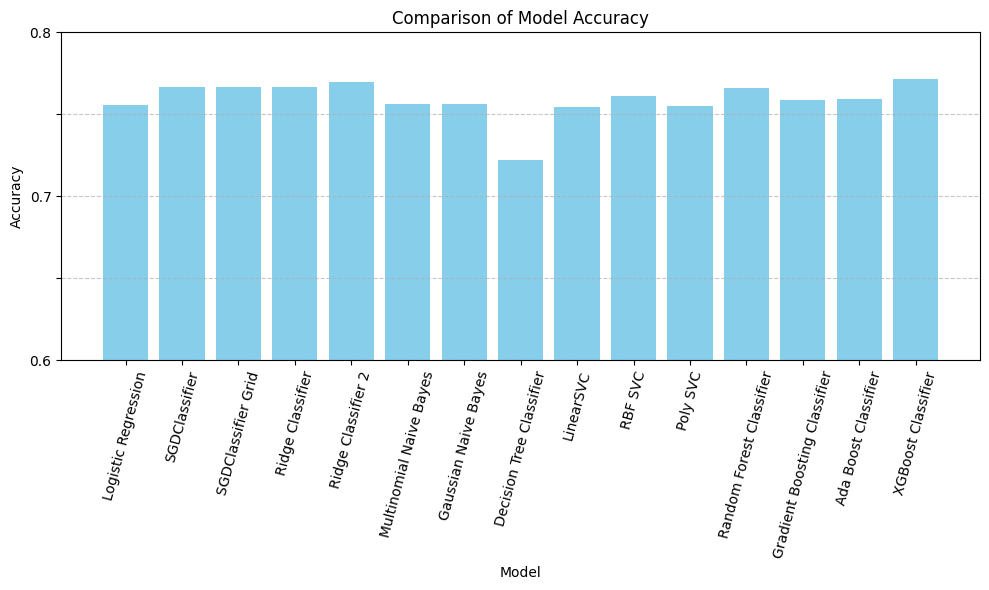

In [45]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(scores['Model'], scores['Accuracy'], color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Comparison of Model Accuracy')
plt.ylim(0.6, 0.8)  # Set y-axis limits
plt.yticks([0.6, 0.65, 0.7, 0.75, 0.8], ['0.6', '', '0.7', '', '0.8'])  
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=75)  
plt.tight_layout()
plt.show()

#### Model Comparison Results

- The XGBoost Classifier achieved the highest accuracy score of 0.771261, indicating its effectiveness in classification tasks.
- Models such as Ridge Classifier 2 and Random Forest Classifier Grid also performed well, with accuracy scores of 0.769428 and 0.765762 respectively.
- Decision Tree Classifier Grid had the lowest accuracy score of 0.722000, suggesting that it may not be as effective in this particular task.
- Overall, the majority of models achieved accuracy scores above 0.75, indicating decent performance in classifying the data.

<Figure size 800x600 with 0 Axes>

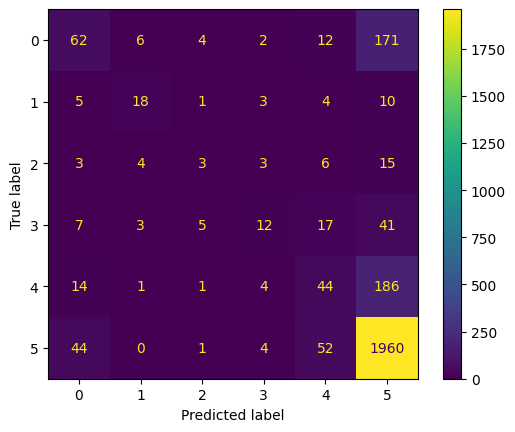

In [51]:
# Confusion Matrix for Ridge Classifier 2

plt.figure(figsize=(8, 6))
X_test = pipeline_4[0].transform(X_test)
y_pred = pipeline_4[3].predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=pipeline_4[3].classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=pipeline_4[3].classes_)
disp.plot()

plt.show()


In [53]:
# Classification Report

print(classification_report(y_test, y_pred, labels=pipeline_4[3].classes_))

              precision    recall  f1-score   support

           0       0.46      0.24      0.32       257
           1       0.56      0.44      0.49        41
           2       0.20      0.09      0.12        34
           3       0.43      0.14      0.21        85
           4       0.33      0.18      0.23       250
           5       0.82      0.95      0.88      2061

    accuracy                           0.77      2728
   macro avg       0.47      0.34      0.38      2728
weighted avg       0.72      0.77      0.73      2728



### Test Data Prediction and Submission

In [70]:
test = pd.read_csv('/kaggle/input/recipe-for-rating-predict-food-ratings-using-ml/test.csv')

In [71]:
test.shape

(4546, 14)

In [72]:
# transform the test data
test.drop(['ID','CreationTimestamp', 'CommentID', 'UserID', 'UserName','RecipeNumber','RecipeName'],axis=1,inplace=True)

In [73]:
test['TotalInteractionCount'] = test['ThumbsUpCount'] + test['ThumbsDownCount'] + test['ReplyCount']
test['InteractionRatio'] = test['ThumbsUpCount'] / (test['TotalInteractionCount']+1)
test['InteractionRatePerComment'] = (test['ThumbsUpCount'] + test['ThumbsDownCount']) / (test['ReplyCount'] + 1)
test['InteractionDiversity'] = test['ThumbsDownCount'] / (test['ThumbsUpCount'] + test['ThumbsDownCount']+1)

In [74]:
test.shape

(4546, 11)

**Since Ridge Classifier  is the best model, we will use it to predict the test data and submit the results.**

In [75]:
test = pipeline3[0].transform(test)

pred = pipeline3[1].predict(test)

In [76]:
# Submission
submission_df = pd.DataFrame({'ID': range(1, len(pred) + 1), 'Rating': pred})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)